In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator

In [2]:
categories=["absent","present"]
IMG_SIZE = 200

In [3]:
def create_data(datadir):
    data=[]
    for category in categories:  
        path = os.path.join(datadir,category) 
        class_num = categories.index(category)  
        for k,img in enumerate(tqdm(os.listdir(path))):
            if k>2499:
                break
            x=os.path.join(path,img)
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            data.append([new_array, class_num]) 
    return data

def data_split(data):
    x,y=list(),list()
    for features,labels in data:
        x.append(features)
        y.append(labels)
    return [x,y]

def preprocess(x,y):
    X=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    y=np.array(y)
    return [X,y]

In [4]:
traindir='/kaggle/input/xrayimgs/test'
testdir='/kaggle/input/xrayimgs/valid'
validdir='/kaggle/input/xrayimgs/train'

training_data=create_data(traindir)
testing_data=create_data(testdir)
validate_data=create_data(validdir)

print('Training Data Count:',len(training_data))
print('Testing Data Count:',len(testing_data))
print('Validation Data Count:',len(validate_data))

X_train, y_train = data_split(training_data)
X_test, y_test = data_split(testing_data)
X_valid, y_valid = data_split(validate_data)

X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
X_valid, y_valid = preprocess(X_valid, y_valid)

X_train= X_train/255.0
X_test= X_test/255.0
X_valid= X_valid/255.0

 32%|███▏      | 2500/7861 [00:19<00:40, 131.00it/s]


Training Data Count: 4693
Testing Data Count: 4581
Validation Data Count: 5000


In [5]:
model=Sequential()


model.add(Conv2D(32,(3,3), activation= 'relu', padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
          

model.add(Conv2D(128,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
          

model.add(Conv2D(256,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dropout(0.5))
          
          
model.add(Dense(256))
model.add(Dropout(0.6))       
model.add(Dense(512, activation= 'sigmoid'))
model.add(Dense(2))
          
          
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(3e-4),
              metrics=['accuracy'])

In [6]:
record = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_valid,y_valid),
    
)

Epoch 1/30
37/37 [==============================] - 36s 560ms/step - loss: 0.7605 - accuracy: 0.5385 - val_loss: 0.7463 - val_accuracy: 0.5000
Epoch 2/30
37/37 [==============================] - 15s 407ms/step - loss: 0.6793 - accuracy: 0.5821 - val_loss: 0.9861 - val_accuracy: 0.5000
Epoch 3/30
37/37 [==============================] - 15s 407ms/step - loss: 0.6747 - accuracy: 0.5838 - val_loss: 0.8118 - val_accuracy: 0.5000
Epoch 4/30
37/37 [==============================] - 15s 407ms/step - loss: 0.6609 - accuracy: 0.5998 - val_loss: 0.7418 - val_accuracy: 0.5000
Epoch 5/30
37/37 [==============================] - 12s 338ms/step - loss: 0.6586 - accuracy: 0.5894 - val_loss: 0.7282 - val_accuracy: 0.4978
Epoch 6/30
37/37 [==============================] - 12s 339ms/step - loss: 0.6579 - accuracy: 0.5983 - val_loss: 0.7242 - val_accuracy: 0.4912
Epoch 7/30
37/37 [==============================] - 15s 407ms/step - loss: 0.6597 - accuracy: 0.6020 - val_loss: 0.7559 - val_accuracy: 0.5000

In [7]:
loss=record.history['loss']
val_loss=record.history['val_loss']
acc=record.history['accuracy']
val_acc=record.history['val_accuracy']
epochs=range(1,len(loss)+1)

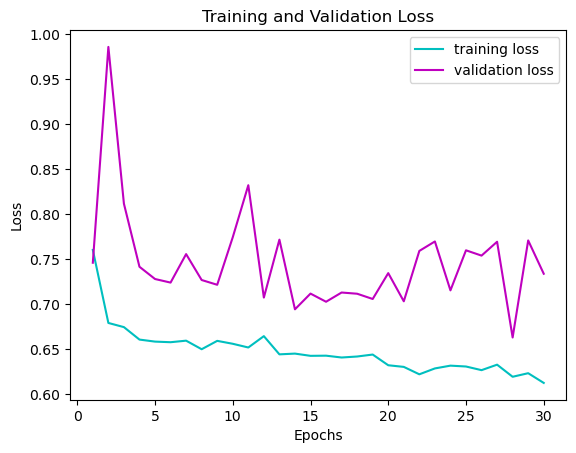

In [8]:
plt.plot(epochs,loss,'c',label="training loss")
plt.plot(epochs,val_loss,'m',label="validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

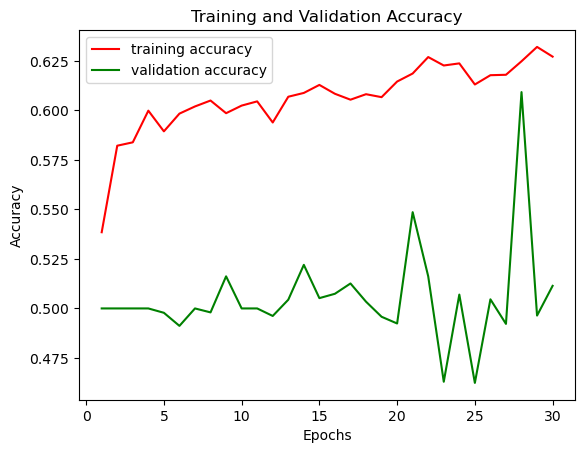

In [9]:
plt.plot(epochs,acc,'r',label="training accuracy")
plt.plot(epochs,val_acc,'g',label="validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
loss,accu=model.evaluate(X_test,y_test)
print("Accuracy : ",accu)
print("Loss     : ",loss)

144/144 [==============================] - 4s 21ms/step - loss: 0.7530 - accuracy: 0.4761
Accuracy :  0.4760969281196594
Loss     :  0.7530168890953064


In [13]:
model.save('model1.h5')